In [11]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import min_max_norm
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [12]:
## DLDC for better approximating the integral operator
## Generate dataset form arbitrary function
x = np.linspace(0, 1, 50)
dx = x[1]-x[0]
y = 5*x**3+4*x**2
dydx= 15*x**2+8*x
## Re-arraging data
X = np.column_stack((dydx[0:48], y[0:48]))
Y = y[1:49]
print(Y)

[1.70847181e-03 7.00388444e-03 1.61412337e-02 2.93755153e-02
 4.69617251e-02 6.91548589e-02 9.62099125e-02 1.28381882e-01
 1.65925762e-01 2.09096550e-01 2.58149241e-01 3.13338830e-01
 3.74920314e-01 4.43148688e-01 5.18278948e-01 6.00566091e-01
 6.90265111e-01 7.87631004e-01 8.92918767e-01 1.00638339e+00
 1.12827988e+00 1.25886323e+00 1.39838843e+00 1.54711047e+00
 1.70528436e+00 1.87316509e+00 2.05100766e+00 2.23906706e+00
 2.43759828e+00 2.64685633e+00 2.86709619e+00 3.09857287e+00
 3.34154136e+00 3.59625666e+00 3.86297376e+00 4.14194766e+00
 4.43343335e+00 4.73768583e+00 5.05496009e+00 5.38551114e+00
 5.72959396e+00 6.08746356e+00 6.45937492e+00 6.84558305e+00
 7.24634294e+00 7.66190958e+00 8.09253797e+00 8.53848312e+00]


In [13]:
print(X)

[[0.00000000e+00 0.00000000e+00]
 [1.69512703e-01 1.70847181e-03]
 [3.51520200e-01 7.00388444e-03]
 [5.46022491e-01 1.61412337e-02]
 [7.53019575e-01 2.93755153e-02]
 [9.72511454e-01 4.69617251e-02]
 [1.20449813e+00 6.91548589e-02]
 [1.44897959e+00 9.62099125e-02]
 [1.70595585e+00 1.28381882e-01]
 [1.97542691e+00 1.65925762e-01]
 [2.25739275e+00 2.09096550e-01]
 [2.55185339e+00 2.58149241e-01]
 [2.85880883e+00 3.13338830e-01]
 [3.17825906e+00 3.74920314e-01]
 [3.51020408e+00 4.43148688e-01]
 [3.85464390e+00 5.18278948e-01]
 [4.21157851e+00 6.00566091e-01]
 [4.58100791e+00 6.90265111e-01]
 [4.96293211e+00 7.87631004e-01]
 [5.35735110e+00 8.92918767e-01]
 [5.76426489e+00 1.00638339e+00]
 [6.18367347e+00 1.12827988e+00]
 [6.61557684e+00 1.25886323e+00]
 [7.05997501e+00 1.39838843e+00]
 [7.51686797e+00 1.54711047e+00]
 [7.98625573e+00 1.70528436e+00]
 [8.46813828e+00 1.87316509e+00]
 [8.96251562e+00 2.05100766e+00]
 [9.46938776e+00 2.23906706e+00]
 [9.98875469e+00 2.43759828e+00]
 [1.052061

In [14]:
## Create model
model = Sequential()
model.add(Dense(units=1, activation='linear', use_bias=False))
# Compile and fit
model.compile(optimizer= Adam(learning_rate=1), loss='mse')
history = model.fit(X, Y, epochs=500)
# Check weights
w = model.layers[0].get_weights()
print('Wights are '+str(w[0][0])+' and '+str(w[0][1]))
print('1/dx is equal to: '+str(1/dx))

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 162.0538
Epoch 2/500
2/2 [==============================] - 0s 999us/step - loss: 90.3152
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 64.4228
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 7.7500
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 57.1776
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 20.3640
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 9.4210
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 29.6973
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 9.4024
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 2.7311
Epoch 11/500
2/2 [==============================] - 0s 987us/step - loss: 17.2169
Epoch 12/500
2/2 [==============================] - 0s 993us/step - loss: 7.8653
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 2ms/step - loss: 1.1267e-06
Epoch 102/500
2/2 [==============================] - 0s 998us/step - loss: 9.3639e-07
Epoch 103/500
2/2 [==============================] - 0s 2ms/step - loss: 1.0580e-06
Epoch 104/500
2/2 [==============================] - 0s 2ms/step - loss: 8.0068e-07
Epoch 105/500
2/2 [==============================] - 0s 1000us/step - loss: 8.4722e-07
Epoch 106/500
2/2 [==============================] - 0s 2ms/step - loss: 6.4408e-07
Epoch 107/500
2/2 [==============================] - 0s 2ms/step - loss: 8.2084e-07
Epoch 108/500
2/2 [==============================] - 0s 1000us/step - loss: 6.3382e-07
Epoch 109/500
2/2 [==============================] - 0s 999us/step - loss: 6.8914e-07
Epoch 110/500
2/2 [==============================] - 0s 2ms/step - loss: 6.3523e-07
Epoch 111/500
2/2 [==============================] - 0s 2ms/step - loss: 6.1398e-07
Epoch 112/500
2/2 [==============================] - 0s 2ms/step - loss: 6.2700e

2/2 [==============================] - 0s 1ms/step - loss: 6.7774e-07
Epoch 198/500
2/2 [==============================] - 0s 1ms/step - loss: 7.4743e-07
Epoch 199/500
2/2 [==============================] - 0s 999us/step - loss: 6.5762e-07
Epoch 200/500
2/2 [==============================] - 0s 1000us/step - loss: 8.2937e-07
Epoch 201/500
2/2 [==============================] - 0s 2ms/step - loss: 8.1927e-07
Epoch 202/500
2/2 [==============================] - 0s 2ms/step - loss: 6.7405e-07
Epoch 203/500
2/2 [==============================] - 0s 2ms/step - loss: 7.4919e-07
Epoch 204/500
2/2 [==============================] - 0s 1000us/step - loss: 9.3096e-07
Epoch 205/500
2/2 [==============================] - 0s 2ms/step - loss: 8.7567e-07
Epoch 206/500
2/2 [==============================] - 0s 999us/step - loss: 8.7280e-07
Epoch 207/500
2/2 [==============================] - 0s 999us/step - loss: 1.0790e-06
Epoch 208/500
2/2 [==============================] - 0s 2ms/step - loss: 7.610

2/2 [==============================] - 0s 1ms/step - loss: 6.6473e-07
Epoch 295/500
2/2 [==============================] - 0s 2ms/step - loss: 6.9387e-07
Epoch 296/500
2/2 [==============================] - 0s 1000us/step - loss: 6.3704e-07
Epoch 297/500
2/2 [==============================] - 0s 999us/step - loss: 6.8181e-07
Epoch 298/500
2/2 [==============================] - 0s 999us/step - loss: 6.1601e-07
Epoch 299/500
2/2 [==============================] - 0s 2ms/step - loss: 7.0593e-07
Epoch 300/500
2/2 [==============================] - 0s 2ms/step - loss: 6.2929e-07
Epoch 301/500
2/2 [==============================] - 0s 1000us/step - loss: 6.0536e-07
Epoch 302/500
2/2 [==============================] - 0s 1000us/step - loss: 6.8456e-07
Epoch 303/500
2/2 [==============================] - 0s 2ms/step - loss: 6.0739e-07
Epoch 304/500
2/2 [==============================] - 0s 1000us/step - loss: 6.3063e-07
Epoch 305/500
2/2 [==============================] - 0s 2ms/step - loss: 5

2/2 [==============================] - 0s 2ms/step - loss: 6.2030e-07
Epoch 391/500
2/2 [==============================] - 0s 2ms/step - loss: 5.9519e-07
Epoch 392/500
2/2 [==============================] - 0s 1ms/step - loss: 6.0911e-07
Epoch 393/500
2/2 [==============================] - 0s 2ms/step - loss: 6.1184e-07
Epoch 394/500
2/2 [==============================] - 0s 1000us/step - loss: 6.0950e-07
Epoch 395/500
2/2 [==============================] - 0s 1ms/step - loss: 5.9350e-07
Epoch 396/500
2/2 [==============================] - 0s 2ms/step - loss: 6.3215e-07
Epoch 397/500
2/2 [==============================] - 0s 1000us/step - loss: 5.8924e-07
Epoch 398/500
2/2 [==============================] - 0s 999us/step - loss: 6.3121e-07
Epoch 399/500
2/2 [==============================] - 0s 2ms/step - loss: 6.4485e-07
Epoch 400/500
2/2 [==============================] - 0s 2ms/step - loss: 6.2373e-07
Epoch 401/500
2/2 [==============================] - 0s 999us/step - loss: 6.0659e

2/2 [==============================] - 0s 2ms/step - loss: 8.3025e-07
Epoch 487/500
2/2 [==============================] - 0s 2ms/step - loss: 7.6663e-07
Epoch 488/500
2/2 [==============================] - 0s 999us/step - loss: 6.3768e-07
Epoch 489/500
2/2 [==============================] - 0s 993us/step - loss: 7.2138e-07
Epoch 490/500
2/2 [==============================] - 0s 2ms/step - loss: 6.2825e-07
Epoch 491/500
2/2 [==============================] - 0s 2ms/step - loss: 6.5769e-07
Epoch 492/500
2/2 [==============================] - 0s 1ms/step - loss: 7.6291e-07
Epoch 493/500
2/2 [==============================] - 0s 2ms/step - loss: 8.0281e-07
Epoch 494/500
2/2 [==============================] - 0s 2ms/step - loss: 6.0308e-07
Epoch 495/500
2/2 [==============================] - 0s 2ms/step - loss: 6.2737e-07
Epoch 496/500
2/2 [==============================] - 0s 2ms/step - loss: 6.9368e-07
Epoch 497/500
2/2 [==============================] - 0s 2ms/step - loss: 6.3044e-07
Ep

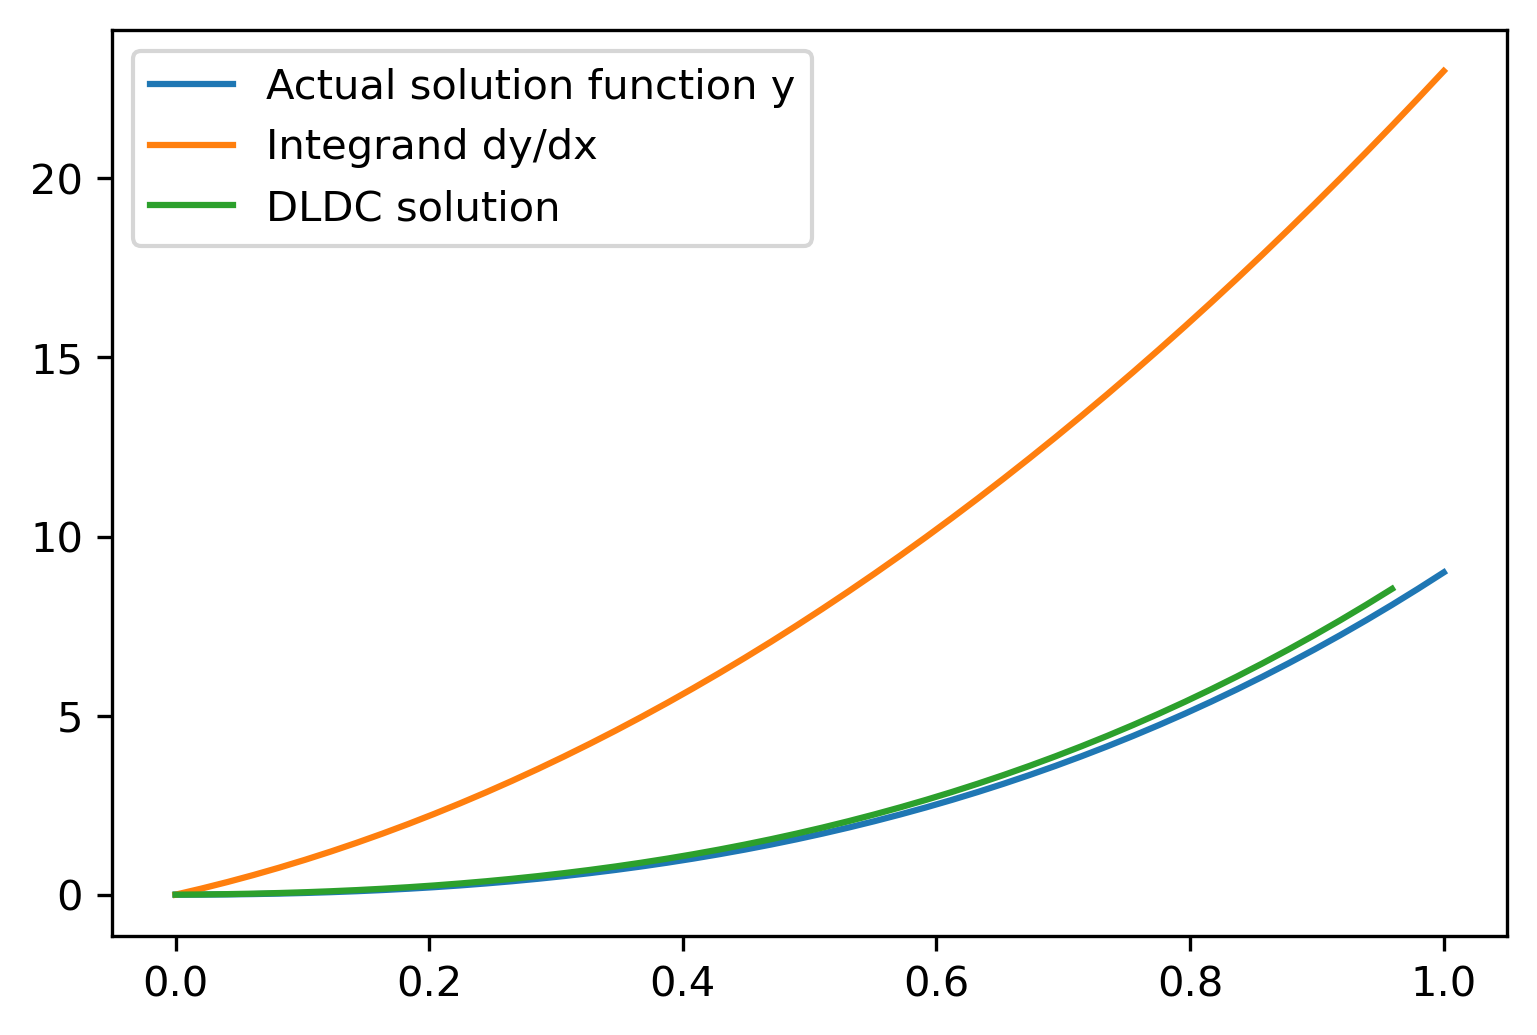

In [15]:
# Plot result
DLDC_inty = model.predict(X)
plt.figure()
plt.plot(x, y, label='Actual solution function y')
plt.plot(x, dydx, label='Integrand dy/dx')
plt.plot(x[0:48], DLDC_inty, label='DLDC solution')
plt.legend()
plt.show(block=False)

In [16]:
## DLDC for better approximating the differential operator
## Generate dataset form arbitrary function
Initial_cond = 0
Final_point = 1
Number_of_points = int((Final_point-Initial_cond)/dx)
x = np.linspace(Initial_cond, Final_point, 50)
dx1 = x[1]-x[0]
y = 5*x**3+4*x**2

In [17]:
print(Number_of_points)

49


In [18]:
print(dx1)

0.02040816326530612


In [19]:
def integrand_func(p):
    Z=1/(1+p**2)
    return Z


In [20]:
for i in x:
    if 
    X = [integrand_func(i) Initial_cond]
    

SyntaxError: invalid syntax (Temp/ipykernel_7940/2745082946.py, line 2)